In [ ]:
import sqlite3

conn = sqlite3.connect('cars.sqlite3')
conn.close()

conn = sqlite3.connect('cars.sqlite3')
curs = conn.cursor()

script = """CREATE TABLE cars ( 
                link TEXT NOT NULL PRIMARY KEY,
                brand TEXT NOT NULL,
                country TEXT,
                year REAL NOT NULL,
                engine_power REAL NOT NULL,
                fuel TEXT NOT NULL,
                tank_volume REAL,
                gear_shift_box TEXT NOT NULL,
                drive_train TEXT NOT NULL,
                price REAL NOT NULL
                ) 
                """

curs.executescript(script)
conn.close()

In [ ]:
HEADERS = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:49.0) Gecko/20100101 Firefox/49.0',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
            'Accept-Language': 'en-US,en;q=0.5',
            'Accept-Encoding': 'gzip, deflate',
            'DNT': '1',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1'
        }

import requests
from bs4 import BeautifulSoup

BASE = []
for page in range (1,353):
    SITE = f'https://auto.ria.com/uk/newauto/search/?page={page}&categoryId=1'
    
    r = requests.get(SITE, headers = HEADERS)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'lxml')
        
        
        for el in soup.find('div', class_ = "na-gallery-view list-view").find_all('div', class_ = "proposition"): 
            link = 'https://auto.ria.com/uk' + el.find('a').get('href')
            brand = el.find('span', class_= "link").text.split(' ')[1]
            year = el.find('span', class_= "link").text.split(' ')[-2]
            fuel = el.find('span', class_= "item").text.split('   • ')[0].replace(' ','')
            gear_shift_box = el.find('div', class_= "proposition_information").text.split(' ')[-5]
            drive_train = el.find('div', class_= "proposition_information").text.split(' ')[-3]
            engine_power = el.find('div', class_= "proposition_equip size13").text.split(' к.с')[0].split('(')[-1]
            
            try:
                tank_volume = el.find('span', class_= "item").text.split('   • ')[1].replace(' л','')
            except IndexError as e:
                tank_volume = 0.0
            
            unformatted_price = el.find('span', class_= "green bold size22").text.replace(' $','')
            price = int(unformatted_price.replace(' ',''))
            
            if brand in ['Mitsubishi', 'Nissan', 'Mazda', 'Toyota', 'Suzuki', 'Honda', 'Subaru', 'Lexus', 'Infiniti', 'Kawasaki', 'Yamaha', 'Isuzu', 'Acura']: 
                country = 'Japan';
            elif brand in ['Mercedes-Benz', 'Volkswagen', 'Opel', 'BMW', 'Audi', 'Porsche']:
                country = 'Germany';
            elif brand in ['Peugeot', 'Renault', 'Citroen', 'DS']:
                country = 'France';
            elif brand in ['Kia', 'Hyundai']:
                country = 'Korea';
            elif brand in ['Chery', 'JAC', 'Lifan', 'FAW', 'Byton', 'Haval', 'Jetour']:
                country = 'China';
            elif brand in ['Ford', 'Jeep', 'GMC', 'Chevrolet', 'Tesla', 'Cadillac', 'Dodge', 'Lucid', 'Lincoln', 'Rivian']:
                country = 'USA';
            elif brand in ['Lada', 'ГАЗ', 'УАЗ', 'ЗАЗ']:
                country = 'Russia';
            elif brand in ['Fiat', 'Maserati', 'Iveco', 'Alfa Romeo', 'Lamborghini', 'Ferrari']:
                country = 'Italy';
            elif brand in ['Land Rover', 'Jaguar', 'MINI', 'Bentley', 'Rolls-Royce']:
                country = 'Great Britain';
            elif brand in ['Skoda']:
                country = 'Czech Republic'
            elif brand in ['ЗАЗ']:
                country = 'Ukraine';
            elif brand in ['Polestar', 'Volvo']:
                country = 'Sweden'
            elif brand in ['Ravon']:
                country = 'Uzbekistan';
            elif brand in ['SEAT']:
                country = 'Spain';
            else:
                country = None
                
            BASE = [ (link, brand, country, year, engine_power, fuel, tank_volume, gear_shift_box, drive_train, price) ]
            
            for object_info in BASE:
                conn = sqlite3.connect('cars.sqlite3')
                curs = conn.cursor()

                p = "INSERT INTO cars VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
                try:
                    curs.execute(p, object_info)
                    conn.commit()
                except Exception as e:
                    print(e)

                conn.close()

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("cars.sqlite3")
df = pd.read_sql_query("SELECT * from cars", con)

print(df.head())

con.close()

                                                link          brand  \
0  https://auto.ria.com/uk/newauto/auto-volkswage...     Volkswagen   
1  https://auto.ria.com/uk/newauto/auto-bentley-c...        Bentley   
2  https://auto.ria.com/uk/newauto/auto-bentley-f...        Bentley   
3  https://auto.ria.com/uk/newauto/auto-mercedes-...  Mercedes-Benz   
4  https://auto.ria.com/uk/newauto/auto-mercedes-...  Mercedes-Benz   

         country    year  engine_power    fuel  tank_volume gear_shift_box  \
0        Germany  2021.0         231.0  Дизель          3.0        Автомат   
1  Great Britain  2021.0         550.0  Бензин          4.0        Автомат   
2  Great Britain  2021.0         550.0  Бензин          4.0        Автомат   
3        Germany  2020.0         435.0  Бензин          3.0        Автомат   
4        Germany  2021.0         330.0  Дизель          2.9        Автомат   

  drive_train     price  
0      Повний   61300.0  
1      Повний  355100.0  
2      Повний  375002.0  


In [2]:
df.head()

,link,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
0,https://auto.ria.com/uk/newauto/auto-volkswage...,Volkswagen,Germany,2021.0,231.0,Дизель,3.0,Автомат,Повний,61300.0
1,https://auto.ria.com/uk/newauto/auto-bentley-c...,Bentley,Great Britain,2021.0,550.0,Бензин,4.0,Автомат,Повний,355100.0
2,https://auto.ria.com/uk/newauto/auto-bentley-f...,Bentley,Great Britain,2021.0,550.0,Бензин,4.0,Автомат,Повний,375002.0
3,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2020.0,435.0,Бензин,3.0,Автомат,Повний,192711.0
4,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2021.0,330.0,Дизель,2.9,Автомат,Повний,116866.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   link            6393 non-null   object 
 1   brand           6393 non-null   object 
 2   country         6230 non-null   object 
 3   year            6393 non-null   float64
 4   engine_power    6393 non-null   float64
 5   fuel            6393 non-null   object 
 6   tank_volume     6393 non-null   float64
 7   gear_shift_box  6393 non-null   object 
 8   drive_train     6393 non-null   object 
 9   price           6393 non-null   float64
dtypes: float64(4), object(6)
memory usage: 499.6+ KB


In [4]:
df.describe()

,year,engine_power,tank_volume,price
count,6393.000000,6393.000000,6393.000000,6.393000e+03
mean,2020.668387,182.301111,1.910605,5.126554e+04
std,0.525772,116.109321,0.816865,7.120338e+04
min,2017.000000,67.000000,0.000000,7.477000e+03
25%,2020.000000,117.000000,1.500000,2.069500e+04
50%,2021.000000,147.000000,1.600000,2.845600e+04
75%,2021.000000,194.000000,2.000000,4.660200e+04
max,2021.000000,800.000000,6.700000,1.398503e+06


In [5]:
df.isnull().sum()

link                0
brand               0
country           163
year                0
engine_power        0
fuel                0
tank_volume         0
gear_shift_box      0
drive_train         0
price               0
dtype: int64

In [6]:
df['brand'] = df['brand'].replace(['Land'],'Land Rover')
df['brand'] = df['brand'].replace(['Alfa'],'Alfa Romeo')

In [7]:
df = df.drop(columns="link")

In [8]:
df.head()

,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
0,Volkswagen,Germany,2021.0,231.0,Дизель,3.0,Автомат,Повний,61300.0
1,Bentley,Great Britain,2021.0,550.0,Бензин,4.0,Автомат,Повний,355100.0
2,Bentley,Great Britain,2021.0,550.0,Бензин,4.0,Автомат,Повний,375002.0
3,Mercedes-Benz,Germany,2020.0,435.0,Бензин,3.0,Автомат,Повний,192711.0
4,Mercedes-Benz,Germany,2021.0,330.0,Дизель,2.9,Автомат,Повний,116866.0


In [9]:
df.loc[df['brand'] == 'Land Rover', 'country'] = 'Great Britain'
df.loc[df['brand'] == 'Alfa Romeo', 'country'] = 'Italy'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           6393 non-null   object 
 1   country         6393 non-null   object 
 2   year            6393 non-null   float64
 3   engine_power    6393 non-null   float64
 4   fuel            6393 non-null   object 
 5   tank_volume     6393 non-null   float64
 6   gear_shift_box  6393 non-null   object 
 7   drive_train     6393 non-null   object 
 8   price           6393 non-null   float64
dtypes: float64(4), object(5)
memory usage: 449.6+ KB


In [11]:
df['year'].value_counts()

2021.0    4418
2020.0    1858
2019.0      91
2018.0      24
2017.0       2
Name: year, dtype: int64

In [12]:
df = df.astype({'year':'int'},errors='ignore')
df

,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
0,Volkswagen,Germany,2021,231.0,Дизель,3.0,Автомат,Повний,61300.0
1,Bentley,Great Britain,2021,550.0,Бензин,4.0,Автомат,Повний,355100.0
2,Bentley,Great Britain,2021,550.0,Бензин,4.0,Автомат,Повний,375002.0
3,Mercedes-Benz,Germany,2020,435.0,Бензин,3.0,Автомат,Повний,192711.0
4,Mercedes-Benz,Germany,2021,330.0,Дизель,2.9,Автомат,Повний,116866.0
...,...,...,...,...,...,...,...,...,...
6388,Lada,Russia,2021,106.0,Бензин,1.6,Механічна,Передній,11315.0
6389,Lada,Russia,2021,87.0,Бензин,1.6,Механічна,Передній,7654.0
6390,Jetour,China,2021,147.0,Бензин,1.5,Автомат,Передній,19900.0
6391,Chery,China,2020,147.0,Бензин,1.5,Автомат,Передній,22000.0


In [13]:
df['year'].value_counts()

2021    4418
2020    1858
2019      91
2018      24
2017       2
Name: year, dtype: int64

In [14]:
df['brand'].unique()

array(['Volkswagen', 'Bentley', 'Mercedes-Benz', 'MINI', 'Volvo',
       'Lamborghini', 'Citroen', 'Peugeot', 'Audi', 'Mitsubishi',
       'Porsche', 'Subaru', 'Mazda', 'Suzuki', 'Land Rover', 'Opel',
       'Kia', 'Rolls-Royce', 'Ferrari', 'Hyundai', 'Skoda', 'Fiat',
       'Jaguar', 'Nissan', 'Maserati', 'Chery', 'Infiniti', 'Renault',
       'Lexus', 'JAC', 'Toyota', 'GMC', 'BMW', 'Ford', 'Honda', 'Lada',
       'FAW', 'Jetour', 'Jeep', 'Haval', 'DS', 'Ravon', 'Alfa Romeo',
       'SEAT', 'Chevrolet', 'Iveco', 'ГАЗ', 'Lincoln', 'Cadillac',
       'Isuzu', 'Acura', 'УАЗ', 'Dodge'], dtype=object)

In [15]:
df['brand'].describe()

count              6393
unique               53
top       Mercedes-Benz
freq                610
Name: brand, dtype: object

In [16]:
a=[]
for i in range(53):
    a.append(str(i+1))
print(a)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53']


In [17]:
# щоб легко знайти бренд по номеру

brand_data = {'brand': ['Volkswagen', 'Bentley', 'Mercedes-Benz', 'MINI', 'Volvo',
       'Lamborghini', 'Citroen', 'Peugeot', 'Audi', 'Mitsubishi',
       'Porsche', 'Subaru', 'Mazda', 'Suzuki', 'Land Rover', 'Opel',
       'Kia', 'Rolls-Royce', 'Ferrari', 'Hyundai', 'Skoda', 'Fiat',
       'Jaguar', 'Nissan', 'Maserati', 'Chery', 'Infiniti', 'Renault',
       'Lexus', 'JAC', 'Toyota', 'GMC', 'BMW', 'Ford', 'Honda', 'Lada',
       'FAW', 'Jetour', 'Jeep', 'Haval', 'DS', 'Ravon', 'Alfa Romeo',
       'SEAT', 'Chevrolet', 'Iveco', 'ГАЗ', 'Lincoln', 'Cadillac',
       'Isuzu', 'Acura', 'УАЗ', 'Dodge'],
        'number': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53']}
brand = pd.DataFrame(brand_data)
brand

,brand,number
0,Volkswagen,1
1,Bentley,2
2,Mercedes-Benz,3
3,MINI,4
4,Volvo,5
5,Lamborghini,6
6,Citroen,7
7,Peugeot,8
8,Audi,9
9,Mitsubishi,10


In [18]:
df['brand'] = df['brand'].replace(['Volkswagen', 'Bentley', 'Mercedes-Benz', 'MINI', 'Volvo',
       'Lamborghini', 'Citroen', 'Peugeot', 'Audi', 'Mitsubishi',
       'Porsche', 'Subaru', 'Mazda', 'Suzuki', 'Land Rover', 'Opel',
       'Kia', 'Rolls-Royce', 'Ferrari', 'Hyundai', 'Skoda', 'Fiat',
       'Jaguar', 'Nissan', 'Maserati', 'Chery', 'Infiniti', 'Renault',
       'Lexus', 'JAC', 'Toyota', 'GMC', 'BMW', 'Ford', 'Honda', 'Lada',
       'FAW', 'Jetour', 'Jeep', 'Haval', 'DS', 'Ravon', 'Alfa Romeo',
       'SEAT', 'Chevrolet', 'Iveco', 'ГАЗ', 'Lincoln', 'Cadillac',
       'Isuzu', 'Acura', 'УАЗ', 'Dodge'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53'])

In [19]:
df['country'].unique()

array(['Germany', 'Great Britain', 'Sweden', 'Italy', 'France', 'Japan',
       'Korea', 'Czech Republic', 'China', 'USA', 'Russia', 'Uzbekistan',
       'Spain'], dtype=object)

In [20]:
df['country'].describe()

count      6393
unique       13
top       Japan
freq       1533
Name: country, dtype: object

In [21]:
c=[]
for i in range(13):
    c.append(str(i+1))
print(c)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']


In [22]:
df['country'] = df['country'].replace(['Germany', 'Great Britain', 'Sweden', 'Italy', 'France', 'Japan',
       'Korea', 'Czech Republic', 'China', 'USA', 'Russia', 'Uzbekistan',
       'Spain'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

In [23]:
# щоб легко знайти країну по номеру

country_data = {'country': ['Germany', 'Great Britain', 'Sweden', 'Italy', 'France', 'Japan',
       'Korea', 'Czech Republic', 'China', 'USA', 'Russia', 'Uzbekistan',
       'Spain'],
        'number': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']}
country = pd.DataFrame(country_data)
country

,country,number
0,Germany,1
1,Great Britain,2
2,Sweden,3
3,Italy,4
4,France,5
5,Japan,6
6,Korea,7
7,Czech Republic,8
8,China,9
9,USA,10


In [25]:
df['country'].describe()

count     6393
unique      13
top          6
freq      1533
Name: country, dtype: object

In [26]:
df['fuel'].value_counts()

Бензин        3977
Дизель        1978
Гібрид         347
Електро         87
Бензин/Газ       4
Name: fuel, dtype: int64

In [27]:
df['fuel'] = df['fuel'].replace(['Гібрид'],'5.0')
df['fuel'] = df['fuel'].replace(['Електро'],'4.0')
df['fuel'] = df['fuel'].replace(['Бензин/Газ'],'3.0')
df['fuel'] = df['fuel'].replace(['Дизель'],'2.0')
df['fuel'] = df['fuel'].replace(['Бензин'],'1.0')

In [28]:
df['fuel'].value_counts()

1.0    3977
2.0    1978
5.0     347
4.0      87
3.0       4
Name: fuel, dtype: int64

In [29]:
df['gear_shift_box'].value_counts()

Автомат         3602
Механічна       1675
Варіатор         920
Роботизована     129
Тіптронік         59
Редуктор           8
Name: gear_shift_box, dtype: int64

In [30]:
df['gear_shift_box'] = df['gear_shift_box'].replace(['Варіатор'],'6.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Автомат'],'5.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Тіптронік'],'4.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Роботизована'],'3.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Механічна'],'2.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Редуктор'],'1.0')

In [31]:
df['gear_shift_box'].value_counts()

5.0    3602
2.0    1675
6.0     920
3.0     129
4.0      59
1.0       8
Name: gear_shift_box, dtype: int64

In [32]:
df['drive_train'].unique()

array(['Повний', 'Передній', 'Задній', ''], dtype=object)

In [33]:
df = df.loc[df['drive_train'] != '']

In [34]:
df['drive_train'].unique()

array(['Повний', 'Передній', 'Задній'], dtype=object)

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
df['drive_train'] = df['drive_train'].replace(['Повний'],'3.0')
df['drive_train'] = df['drive_train'].replace(['Передній'],'2.0')
df['drive_train'] = df['drive_train'].replace(['Задній'],'1.0')

In [37]:
df['drive_train'].unique()

array(['3.0', '2.0', '1.0'], dtype=object)

In [38]:
df = df.astype({'brand':'float64', 'country':'float64', 'fuel':'float64', 'gear_shift_box':'float64', 'drive_train':'float64', 'price':'int'},errors='ignore')
df

,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
0,1.0,1.0,2021,231.0,2.0,3.0,5.0,3.0,61300
1,2.0,2.0,2021,550.0,1.0,4.0,5.0,3.0,355100
2,2.0,2.0,2021,550.0,1.0,4.0,5.0,3.0,375002
3,3.0,1.0,2020,435.0,1.0,3.0,5.0,3.0,192711
4,3.0,1.0,2021,330.0,2.0,2.9,5.0,3.0,116866
...,...,...,...,...,...,...,...,...,...
6388,36.0,11.0,2021,106.0,1.0,1.6,2.0,2.0,11315
6389,36.0,11.0,2021,87.0,1.0,1.6,2.0,2.0,7654
6390,38.0,9.0,2021,147.0,1.0,1.5,5.0,2.0,19900
6391,26.0,9.0,2020,147.0,1.0,1.5,5.0,2.0,22000


In [39]:
df['year'].value_counts()

2021    4381
2020    1851
2019      90
2018      24
2017       2
Name: year, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6348 entries, 0 to 6392
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           6348 non-null   float64
 1   country         6348 non-null   float64
 2   year            6348 non-null   int32  
 3   engine_power    6348 non-null   float64
 4   fuel            6348 non-null   float64
 5   tank_volume     6348 non-null   float64
 6   gear_shift_box  6348 non-null   float64
 7   drive_train     6348 non-null   float64
 8   price           6348 non-null   int32  
dtypes: float64(7), int32(2)
memory usage: 446.3 KB


In [41]:
#фінальний датафрейм

data = df[df['price'] < 800000]

In [42]:
data

,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
0,1.0,1.0,2021,231.0,2.0,3.0,5.0,3.0,61300
1,2.0,2.0,2021,550.0,1.0,4.0,5.0,3.0,355100
2,2.0,2.0,2021,550.0,1.0,4.0,5.0,3.0,375002
3,3.0,1.0,2020,435.0,1.0,3.0,5.0,3.0,192711
4,3.0,1.0,2021,330.0,2.0,2.9,5.0,3.0,116866
...,...,...,...,...,...,...,...,...,...
6388,36.0,11.0,2021,106.0,1.0,1.6,2.0,2.0,11315
6389,36.0,11.0,2021,87.0,1.0,1.6,2.0,2.0,7654
6390,38.0,9.0,2021,147.0,1.0,1.5,5.0,2.0,19900
6391,26.0,9.0,2020,147.0,1.0,1.5,5.0,2.0,22000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6342 entries, 0 to 6392
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           6342 non-null   float64
 1   country         6342 non-null   float64
 2   year            6342 non-null   int32  
 3   engine_power    6342 non-null   float64
 4   fuel            6342 non-null   float64
 5   tank_volume     6342 non-null   float64
 6   gear_shift_box  6342 non-null   float64
 7   drive_train     6342 non-null   float64
 8   price           6342 non-null   int32  
dtypes: float64(7), int32(2)
memory usage: 445.9 KB


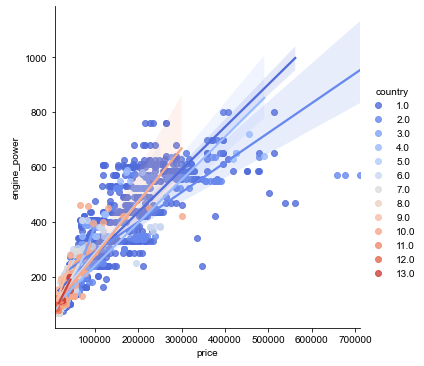

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('price','engine_power', data=data, hue='country',
           palette='coolwarm',fit_reg=True)
sns.set_style('whitegrid')

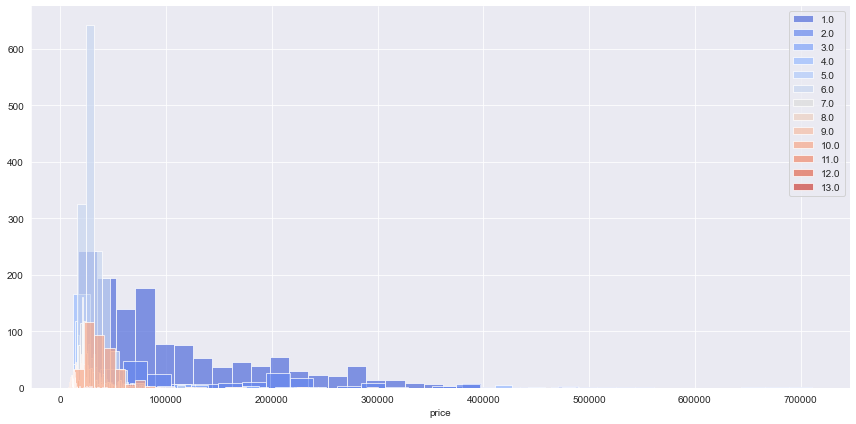

In [45]:
sns.set_style('darkgrid')

g = sns.FacetGrid(data, hue='country', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'price', bins=30, alpha=0.7)
plt.legend(loc=1)

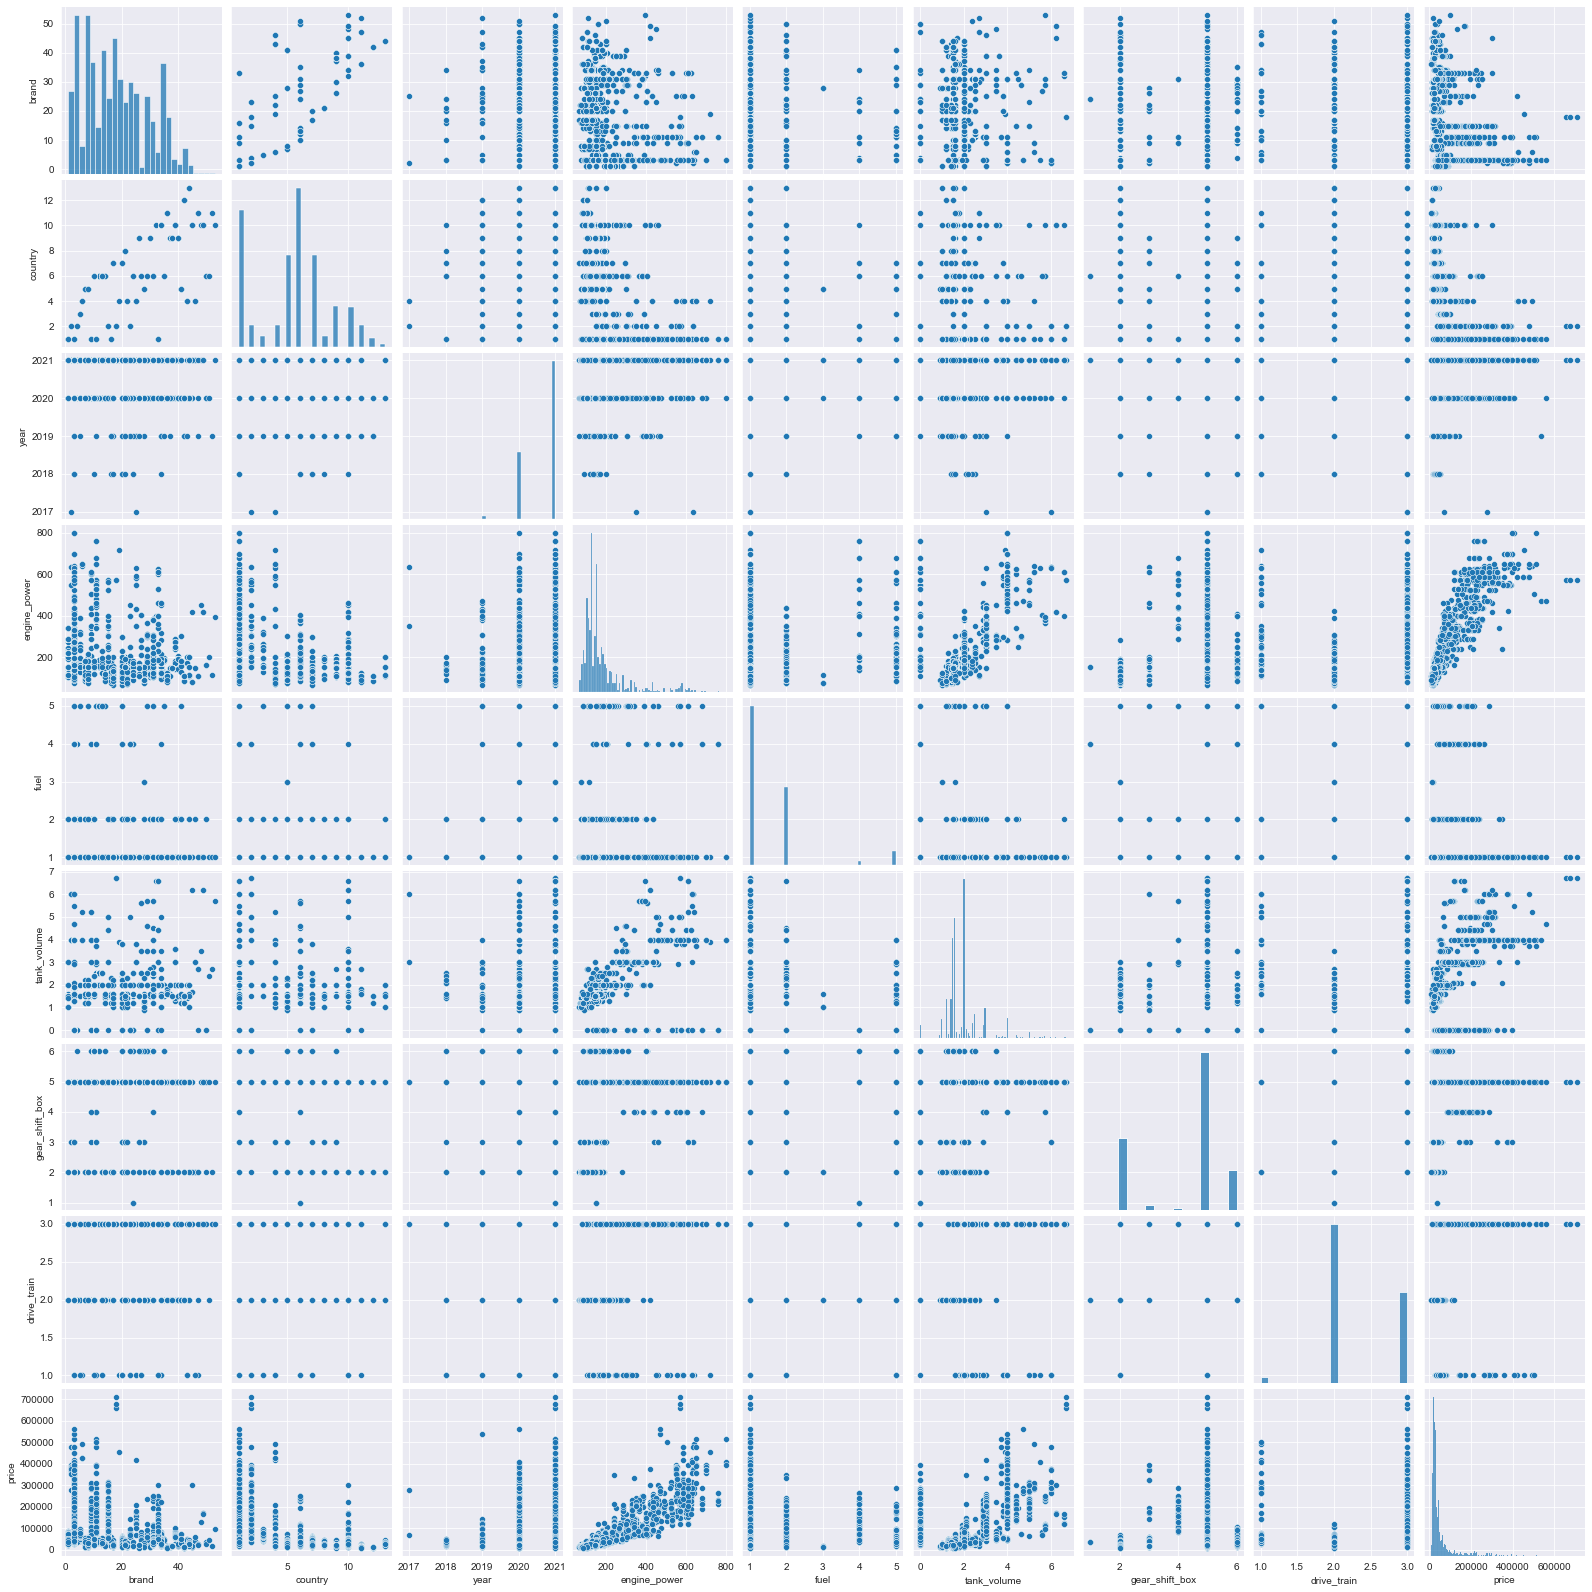

In [46]:
sns.pairplot(data)
sns.set_style('white')

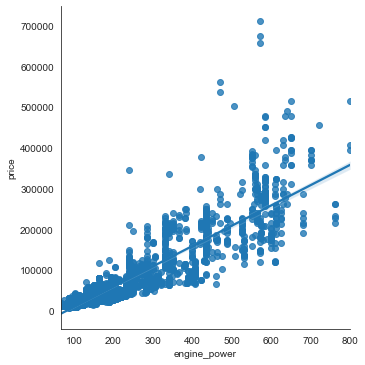

In [47]:
sns.lmplot(x='engine_power', y='price',data=data)

<AxesSubplot:xlabel='price', ylabel='Density'>

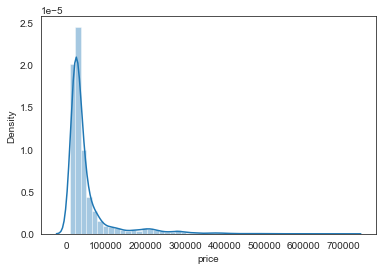

In [48]:
sns.distplot(data['price'])

### Моделювання

In [49]:
X = data.drop('price',axis=1)
y = data['price']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Лінійна регресія

In [51]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [52]:
model_1.coef_

array([  -99.25587112, -1223.20413247, -1562.75636803,   465.0208153 ,
       -2531.36378456,  7579.68445177, -2350.65299004, -1749.52645926])

In [53]:
coeff_rent = pd.DataFrame(model_1.coef_,X.columns,columns=['Coefficient'])
coeff_rent

,Coefficient
brand,-99.255871
country,-1223.204132
year,-1562.756368
engine_power,465.020815
fuel,-2531.363785
tank_volume,7579.684452
gear_shift_box,-2350.652990
drive_train,-1749.526459


In [54]:
importances_ = model_1.coef_.flatten()
indices = np.argsort(importances_)[::-1]

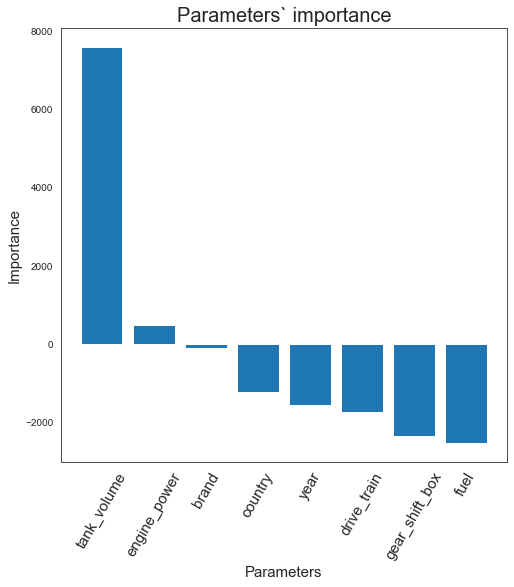

In [55]:
plt.figure(figsize=(8, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)
sns.set_style('whitegrid')
plt.bar(data.columns[indices], importances_[indices])
plt.xticks(rotation=60, size=15)
plt.show()

In [56]:
model_1.score(X_train,y_train)

0.8184907048729514

In [57]:
model_1.score(X_test, y_test)

0.8355265991027254

In [59]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_1)))

MAE: 14091.60780889322
MSE: 599216655.2981906
RMSE: 24478.902248634244


In [58]:
predictions_1 = model_1.predict(X_test)

In [60]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_1 = model_1.predict(np.array([1, 1, 2021, 340, 1, 3, 5, 3]).reshape(1, -1))
predictions_1

array([137805.48046293])

In [61]:
# реальна ціна автомобіля - 71 211 $

In [62]:
result = {}

In [63]:
result['LinearRegression'] = f'Test R^2 = {round(model_1.score(X_test, y_test), 4)}'

### Дерево рішень

In [64]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

for i in range(1,25):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    print(f'qty_depth = {i} Score = {dtree.score(X_train,y_train)}')

qty_depth = 1 Score = 0.6618193291039425
qty_depth = 2 Score = 0.7948297142548271
qty_depth = 3 Score = 0.8485748089690405
qty_depth = 4 Score = 0.8777272900339238
qty_depth = 5 Score = 0.904831919503217
qty_depth = 6 Score = 0.9272179634738131
qty_depth = 7 Score = 0.9425037814125257
qty_depth = 8 Score = 0.9548637574475318
qty_depth = 9 Score = 0.9621053207306702
qty_depth = 10 Score = 0.9647369258098484
qty_depth = 11 Score = 0.9676731735360572
qty_depth = 12 Score = 0.9710232333458412
qty_depth = 13 Score = 0.9723433996873684
qty_depth = 14 Score = 0.9729591968466323
qty_depth = 15 Score = 0.9730016928098338
qty_depth = 16 Score = 0.9730165426745697
qty_depth = 17 Score = 0.9730199308092988
qty_depth = 18 Score = 0.9730205951431011
qty_depth = 19 Score = 0.9730207554479842
qty_depth = 20 Score = 0.9730207556536934
qty_depth = 21 Score = 0.9730207556536934
qty_depth = 22 Score = 0.9730207556536934
qty_depth = 23 Score = 0.9730207556536934
qty_depth = 24 Score = 0.9730207556536934


In [65]:
model_2 = DecisionTreeRegressor(max_depth=20)
model_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [66]:
model_2.score(X_train,y_train)

0.9730207556536934

In [67]:
model_2.score(X_test, y_test)

0.9407030909579164

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))

MAE: 4873.845548611746
MSE: 216033080.80137807
RMSE: 14698.06384532936


In [68]:
predictions_2 = model_2.predict(X_test)

In [69]:
result['DecisionTreeRegressor'] = f'Test R^2 = {round(model_2.score(X_test, y_test), 4)}'

In [71]:
importances_2 = model_2.feature_importances_
indices = np.argsort(importances_2)[::-1]

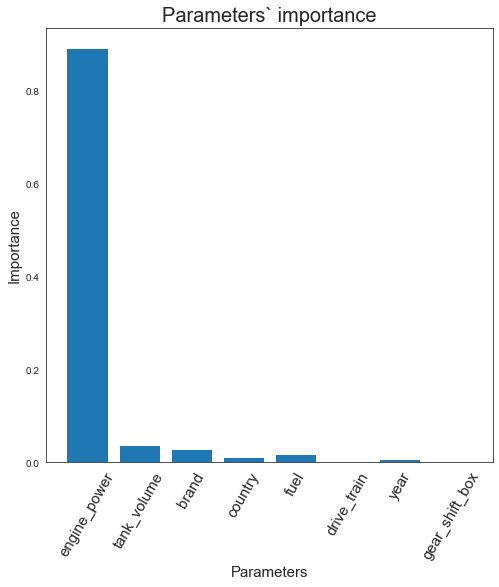

In [128]:
plt.figure(figsize=(8, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

sns.set_style('white')
plt.bar(data.columns[indices], importances_2[indices])
plt.xticks(rotation=60, size=15)
plt.show()

In [73]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_2 = model_2.predict(np.array([1, 1, 2021, 340, 1, 3, 5, 3]).reshape(1, -1))
predictions_2

array([72780.6])

In [74]:
# реальна ціна автомобіля - 71 211 $

### Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)

result['RandomForestRegressor'] = f'Test R^2 = {round(model_3.score(X_test, y_test), 4)} '

In [76]:
model_3.score(X_train, y_train)

0.9687388015492082

In [77]:
model_3.score(X_test,y_test)

0.9515702566590641

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_3))
print('MSE:', metrics.mean_squared_error(y_test, predictions_3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_3)))

MAE: 4766.810790403959
MSE: 176441349.5640577
RMSE: 13283.122733907781


In [78]:
predictions_3 = model_3.predict(X_test)

In [80]:
importances_3 = model_3.feature_importances_
indices = np.argsort(importances_3)[::-1]

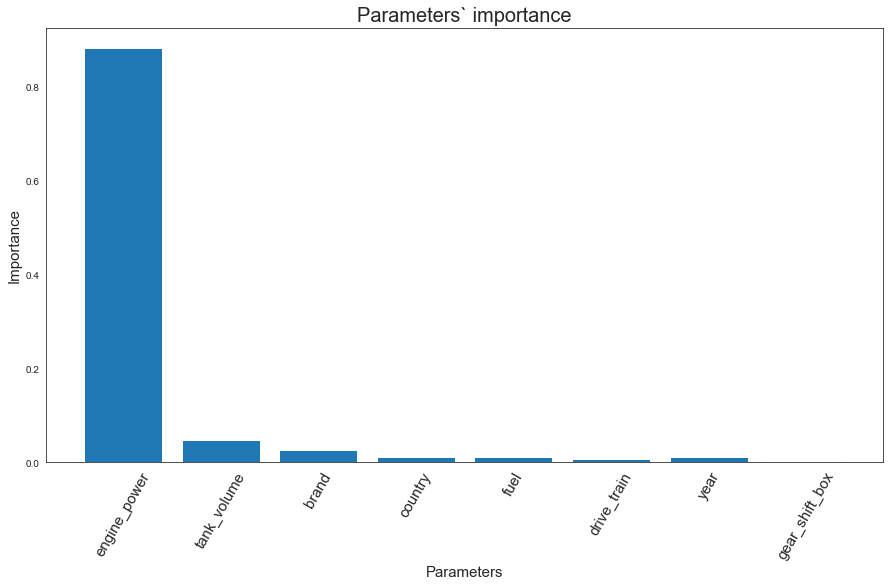

In [129]:
plt.figure(figsize=(15, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

plt.bar(data.columns[indices], importances_3[indices])
plt.xticks(rotation=60, size=15)
plt.show()

In [82]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_3 = model_3.predict(np.array([1, 1, 2021, 340, 1, 3, 5, 3]).reshape(1, -1))
predictions_3

array([72800.06902194])

In [83]:
# реальна ціна автомобіля - 71 211 $

### XGB Boost

In [84]:
import xgboost as xgb
from xgboost import XGBRegressor

model_4 = xgb.XGBRegressor(n_estimators=200)
model_4

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [85]:
model_4.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
model_4.score(X_train, y_train)

0.9729684015610486

In [87]:
model_4.score(X_test,y_test)

0.9508025436043144

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_4))
print('MSE:', metrics.mean_squared_error(y_test, predictions_4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_4)))

MAE: 4715.8523917827115
MSE: 179238315.19124255
RMSE: 13387.991454704568


In [88]:
importances_4 = model_4.feature_importances_
indices = np.argsort(importances_4)[::-1]

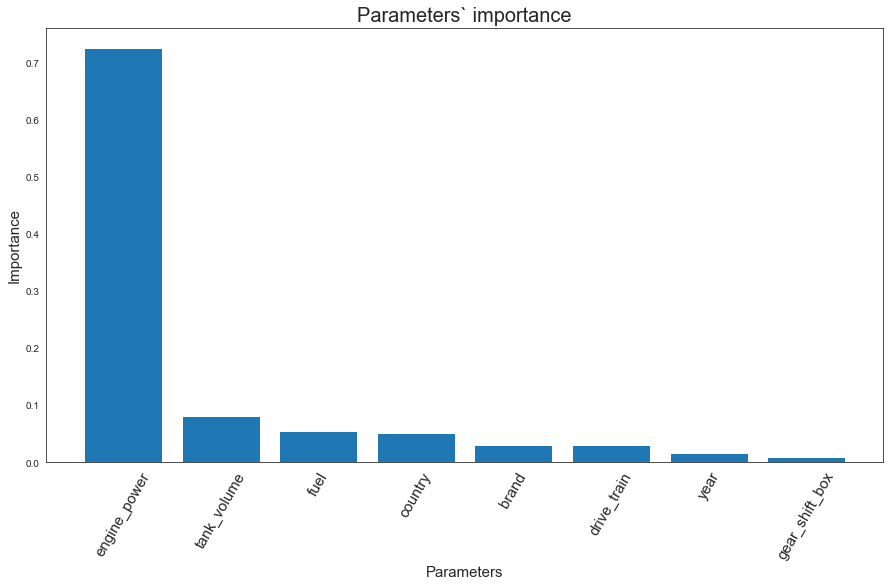

In [89]:
plt.figure(figsize=(15, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

plt.bar(data.columns[indices], importances_4[indices])
plt.xticks(rotation=60, size=15)
plt.show()

In [90]:
predictions_4 = model_4.predict(X_test)

In [92]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_4 = model_4.predict(np.array([1, 1, 2021, 340, 1, 3, 5, 3]).reshape(1, -1))
predictions_4

array([72800.04], dtype=float32)

In [93]:
# реальна ціна автомобіля - 71 211 $

In [94]:
result['XGBRegressor'] = f'Test R^2 = {round(model_4.score(X_test, y_test), 4)}'

### Bagging Regressor

In [95]:
from sklearn.ensemble import BaggingRegressor

model_5 = BaggingRegressor(n_estimators=200)
model_5

BaggingRegressor(n_estimators=200)

In [96]:
model_5.fit(X_train, y_train)

BaggingRegressor(n_estimators=200)

In [97]:
model_5.score(X_train, y_train)

0.9681546643002782

In [98]:
model_5.score(X_test,y_test)

0.950694507380788

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_5))
print('MSE:', metrics.mean_squared_error(y_test, predictions_5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_5)))

MAE: 4803.856765499738
MSE: 179631917.46467614
RMSE: 13402.68321884376


In [99]:
predictions_5 = model_5.predict(X_test)

In [100]:
result['BaggingRegressor'] = f'Test R^2 = {round(model_5.score(X_test, y_test), 4)}'

In [102]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_5 = model_5.predict(np.array([1, 1, 2021, 340, 1, 3, 5, 3]).reshape(1, -1))
predictions_5

array([73013.15696194])

In [103]:
# реальна ціна автомобіля - 71 211 $

### Gradient Boosting Regressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

model_6 = GradientBoostingRegressor(n_estimators=200)
model_6

GradientBoostingRegressor(n_estimators=200)

In [105]:
model_6.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [106]:
model_6.score(X_train, y_train)

0.9569157670737161

In [107]:
model_6.score(X_test,y_test)

0.9481500413321353

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_6))
print('MSE:', metrics.mean_squared_error(y_test, predictions_6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_6)))

MAE: 5996.076365627338
MSE: 188902026.95882934
RMSE: 13744.163377915345


In [108]:
predictions_6 = model_6.predict(X_test)

In [109]:
result['GradientBoostingRegressor'] = f'Test R^2 = {round(model_6.score(X_test, y_test), 4)}'

In [111]:
importances_6 = model_6.feature_importances_
indices = np.argsort(importances_6)[::-1]

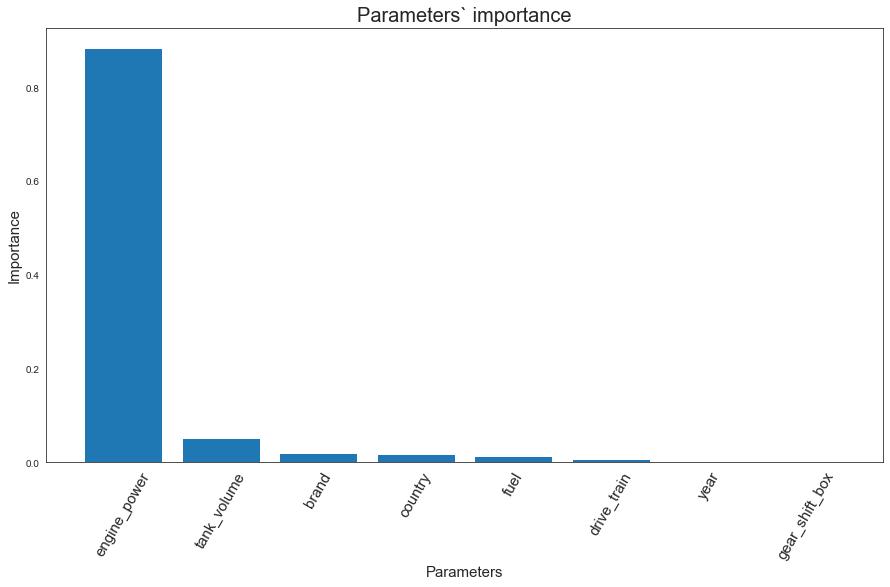

In [130]:
plt.figure(figsize=(15, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

plt.bar(data.columns[indices], importances_6[indices])
plt.xticks(rotation=60,size=15)
plt.show()

In [113]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_6 = model_6.predict(np.array([1, 1, 2021, 340, 1, 3, 5, 3]).reshape(1, -1))
predictions_6

array([78878.54621076])

In [114]:
# реальна ціна автомобіля - 71 211 $

### Ансамбль Voting

In [115]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor(estimators=[('m1',model_1),('m2', model_2),('m3', model_3),('m4', model_4), ('m5', model_5), ('m6', model_6)])
ensemble.fit(X,y)

VotingRegressor(estimators=[('m1', LinearRegression()),
                            ('m2', DecisionTreeRegressor(max_depth=20)),
                            ('m3', RandomForestRegressor()),
                            ('m4',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=200, n_jobs=4,


In [116]:
ensemble.score(X_train, y_train)

0.9625843066709693

In [117]:
ensemble.score(X_test,y_test)

0.9721549877375725

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ensemble))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ensemble))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ensemble)))

MAE: 4570.963445877583
MSE: 101446161.04247761
RMSE: 10072.048502786194


In [118]:
predictions_ensemble = ensemble.predict(X_test)

In [119]:
result['Ensemble VotingRegressor'] = f'Test R^2 = {round(ensemble.score(X_test, y_test), 4)}'

In [121]:
resultt

{'LinearRegression': 'Test R^2 = 0.8355',
 'DecisionTreeRegressor': 'Test R^2 = 0.9407',
 'RandomForestRegressor': 'Test R^2 = 0.9516 ',
 'XGBRegressor': 'Test R^2 = 0.9508',
 'BaggingRegressor': 'Test R^2 = 0.9507',
 'GradientBoostingRegressor': 'Test R^2 = 0.9482',
 'Ensemble VotingRegressor': 'Test R^2 = 0.9722'}

In [122]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_ensemble = ensemble.predict(np.array([1, 1, 2021, 340, 1, 3, 5, 3]).reshape(1, -1))
predictions_ensemble

array([83885.24994534])

In [123]:
# реальна ціна автомобіля - 71 211 $

In [124]:
_predictions = {}

In [125]:
_predictions['LinearRegression'] = int(predictions_1)

In [126]:
_predictions['DecisionTreeRegressor'] = int(predictions_2)
_predictions['RandomForestRegressor'] = int(predictions_3)
_predictions['XGBRegressor'] = int(predictions_4)
_predictions['BaggingRegressor'] = int(predictions_5)
_predictions['GradientBoostingRegressor'] = int(predictions_6)
_predictions['Ensemble VotingRegressor'] = int(predictions_ensemble)

In [127]:
_predictions

{'LinearRegression': 137805,
 'DecisionTreeRegressor': 72780,
 'RandomForestRegressor': 72800,
 'XGBRegressor': 72800,
 'BaggingRegressor': 73013,
 'GradientBoostingRegressor': 78878,
 'Ensemble VotingRegressor': 83885}